## 라이브러리

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import koreanize_matplotlib
import datetime

## 파일 불러오기

In [158]:
fv18 = pd.read_csv("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\2018지출.csv", encoding='cp949')
fv19 = pd.read_csv("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\2019지출.csv", encoding='cp949')
fv22 = pd.read_csv("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\최근1년소비.csv", encoding='cp949')
fvco = pd.read_csv("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\방한여행국적.csv", encoding='cp949')
fvcon = pd.read_csv("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\방한여행대륙.csv", encoding='cp949')
fvr = pd.read_csv("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\방한외래관광객추이.csv", encoding='cp949')
f_consume = pd.read_excel("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\나라별지출.xlsx")
fs_place= pd.read_excel("C:\\Users\\sdy59\\OneDrive\\바탕 화면\\myproject\\travel\\쇼핑장소.xlsx")

In [205]:
fv18.to_csv('2018년소비.csv', index=False)
fv19.to_csv('2019년소비.csv', index=False)
fv22.to_csv('최근1년소비.csv', index=False)
fvco.to_csv('방한여행객국적.csv', index=False)
fvcon.to_csv('방한여행객대륙.csv', index=False)
fvr.to_csv('방한외래관광객추이.csv', index=False)
f_consume.to_csv('나라별지출.csv', index=False)
fs_place.to_csv('쇼핑장소.csv', index=False)

In [159]:
# 컬럼확인
fv18.columns

Index(['기준년월', '지자체', 'KTO업종중분류명', '소비금액', '전년동기소비금액', '구성비', '전년대비소비증감률'], dtype='object')

In [160]:
fv22.rename(columns = {'KTO업종중분류명':'업종'},inplace=True)
fv19.rename(columns = {'KTO업종중분류명':'업종'},inplace=True)
fv18.rename(columns = {'KTO업종중분류명':'업종'},inplace=True)

In [161]:
fv22 = fv22.drop(['구성비','전년대비소비증감률'], axis=1)
fv19 = fv19.drop(['구성비','전년대비소비증감률'], axis=1)
fv18 = fv18.drop(['구성비','전년대비소비증감률'], axis=1)

## 나라별 지출 전처리

In [162]:
f_consume.head()

,Unnamed: 0,사례수,500$ 이하,500$ 초과- 1000$ 이하,1000$ 초과- 1500$ 이하,1500$ 초과- 2000$ 이하,2000$ 초과- 3000$ 이하,3000$ 초과,최대금액초과자
0,일 본,(3358),32.520774,48.187156,11.636791,3.939034,2.018608,1.697637,0.000000
1,중 국,(5447),8.311401,24.581927,21.327170,14.904194,12.581030,16.771034,1.523244
2,홍 콩,(789),13.986096,42.841315,24.055784,9.289102,5.236533,3.918988,0.672182
3,싱 가 포 르,(251),12.037364,36.880780,23.191140,14.843494,8.629780,4.205040,0.212401
4,대 만,(1286),14.294949,41.198511,27.900228,8.316228,5.218169,2.581258,0.490656


In [163]:
f_consume['사례수'] = f_consume['사례수'].str.slice(start=1, stop=-1)

In [164]:
f_consume['사례수'] = f_consume['사례수'].astype('int')

In [165]:
f_consume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          21 non-null     object 
 1   사례수                 21 non-null     int32  
 2   500$ 이하             21 non-null     float64
 3   500$ 초과- 1000$ 이하   21 non-null     float64
 4   1000$ 초과- 1500$ 이하  21 non-null     float64
 5   1500$ 초과- 2000$ 이하  21 non-null     float64
 6   2000$ 초과- 3000$ 이하  21 non-null     float64
 7   3000$ 초과            21 non-null     float64
 8   최대금액초과자             21 non-null     float64
dtypes: float64(7), int32(1), object(1)
memory usage: 1.5+ KB


In [166]:
f_consume.columns

Index(['Unnamed: 0', '사례수', '500$ 이하', '500$ 초과- 1000$ 이하',
       '1000$ 초과- 1500$ 이하', '1500$ 초과- 2000$ 이하', '2000$ 초과- 3000$ 이하',
       '3000$ 초과', '최대금액초과자'],
      dtype='object')

In [167]:
f_consume['500$ 이하'] = f_consume['사례수'] * f_consume['500$ 이하'] * 0.01
f_consume['500$ 초과- 1000$ 이하'] = f_consume['사례수'] * f_consume['500$ 초과- 1000$ 이하'] * 0.01
f_consume['1000$ 초과- 1500$ 이하'] = f_consume['사례수'] * f_consume['1000$ 초과- 1500$ 이하'] * 0.01
f_consume['1500$ 초과- 2000$ 이하'] = f_consume['사례수'] * f_consume['1500$ 초과- 2000$ 이하'] * 0.01
f_consume['2000$ 초과- 3000$ 이하'] = f_consume['사례수'] * f_consume['2000$ 초과- 3000$ 이하'] * 0.01
f_consume['3000$ 초과'] = f_consume['사례수'] * f_consume['3000$ 초과'] * 0.01
f_consume['최대금액초과자'] = f_consume['사례수'] * f_consume['최대금액초과자'] * 0.01


In [168]:
f_consume = f_consume.drop(['사례수'], axis=1)


In [169]:
f_consume.rename(columns = {'Unnamed: 0':'국가'},inplace=True)
f_consume.head()

,국가,500$ 이하,500$ 초과- 1000$ 이하,1000$ 초과- 1500$ 이하,1500$ 초과- 2000$ 이하,2000$ 초과- 3000$ 이하,3000$ 초과,최대금액초과자
0,일 본,1092.047593,1618.124698,390.763428,132.272768,67.784861,57.006653,0.000000
1,중 국,452.722010,1338.977556,1161.690946,811.831448,685.288714,913.518226,82.971099
2,홍 콩,110.350295,338.017979,189.800139,73.291013,41.316247,30.920813,5.303514
3,싱 가 포 르,30.213785,92.570759,58.209762,37.257170,21.660748,10.554650,0.533127
4,대 만,183.833044,529.812855,358.796936,106.946695,67.105648,33.194982,6.309840


In [170]:
f_consume.to_csv('consume.csv', index=False)

In [171]:
f_consume.head()

,국가,500$ 이하,500$ 초과- 1000$ 이하,1000$ 초과- 1500$ 이하,1500$ 초과- 2000$ 이하,2000$ 초과- 3000$ 이하,3000$ 초과,최대금액초과자
0,일 본,1092.047593,1618.124698,390.763428,132.272768,67.784861,57.006653,0.000000
1,중 국,452.722010,1338.977556,1161.690946,811.831448,685.288714,913.518226,82.971099
2,홍 콩,110.350295,338.017979,189.800139,73.291013,41.316247,30.920813,5.303514
3,싱 가 포 르,30.213785,92.570759,58.209762,37.257170,21.660748,10.554650,0.533127
4,대 만,183.833044,529.812855,358.796936,106.946695,67.105648,33.194982,6.309840


In [172]:
f_consume['500$ 이하'] = f_consume['500$ 이하'].astype('int')
f_consume['500$ 초과- 1000$ 이하'] = f_consume['500$ 초과- 1000$ 이하'].astype('int')
f_consume['1000$ 초과- 1500$ 이하'] = f_consume['1000$ 초과- 1500$ 이하'].astype('int')
f_consume['1500$ 초과- 2000$ 이하'] = f_consume['1500$ 초과- 2000$ 이하'].astype('int')
f_consume['2000$ 초과- 3000$ 이하'] = f_consume['2000$ 초과- 3000$ 이하'].astype('int')
f_consume['3000$ 초과'] = f_consume['3000$ 초과'].astype('int')
f_consume['최대금액초과자'] = f_consume['최대금액초과자'].astype('int')

## 국적별 쇼핑장소 전처리

In [173]:
fs_place.head()

,Unnamed: 0,사례수,면세점,로드샵,시장,백화점,▶대형 쇼핑몰,대형마트,기타
0,일 본,(3045),30.117034,44.291233,6.597176,4.088050,5.233076,8.659451,1.013979
1,중 국,(5233),62.115254,23.829309,3.972719,2.751114,2.126564,4.913770,0.291270
2,홍 콩,(759),20.558433,58.711476,7.253056,4.986715,3.096941,5.014204,0.379176
3,싱 가 포 르,(234),12.134288,73.281204,4.502924,4.588362,2.236807,3.183008,0.073407
4,대 만,(1266),35.003545,41.903888,8.802060,5.579456,2.824838,5.504019,0.382195


In [174]:
fs_place['사례수'] = fs_place['사례수'].str.slice(start=1, stop=-1)
fs_place['사례수'] = fs_place['사례수'].astype('int')

In [175]:
fs_place.columns

Index(['Unnamed: 0', '사례수', '면세점', '로드샵', '시장', '백화점', '▶대형 쇼핑몰', '대형마트',
       '기타'],
      dtype='object')

In [176]:
fs_place['면세점'] = fs_place['사례수'] * fs_place['면세점'] * 0.01
fs_place['로드샵'] = fs_place['사례수'] * fs_place['로드샵'] * 0.01
fs_place['시장'] = fs_place['사례수'] * fs_place['시장'] * 0.01
fs_place['백화점'] = fs_place['사례수'] * fs_place['백화점'] * 0.01
fs_place['대형 쇼핑몰'] = fs_place['사례수'] * fs_place['▶대형 쇼핑몰'] * 0.01
fs_place['대형마트'] = fs_place['사례수'] * fs_place['대형마트'] * 0.01
fs_place['기타'] = fs_place['사례수'] * fs_place['기타'] * 0.01
fs_place.head(5)

,Unnamed: 0,사례수,면세점,로드샵,시장,백화점,▶대형 쇼핑몰,대형마트,기타,대형 쇼핑몰
0,일 본,3045,917.063691,1348.668034,200.884015,124.481126,5.233076,263.680294,30.875669,159.347171
1,중 국,5233,3250.491265,1246.987715,207.892366,143.965788,2.126564,257.137600,15.242176,111.283089
2,홍 콩,759,156.038507,445.620102,55.050695,37.849165,3.096941,38.057806,2.877944,23.505780
3,싱 가 포 르,234,28.394234,171.478017,10.536842,10.736768,2.236807,7.448238,0.171772,5.234129
4,대 만,1266,443.144878,530.503221,111.434077,70.635908,2.824838,69.680875,4.838591,35.762450


In [177]:
fs_place = fs_place.drop(['사례수'], axis=1)

In [178]:
fs_place.rename(columns = {'Unnamed: 0':'국가'},inplace=True)

In [179]:
fs_place.head(5)

,국가,면세점,로드샵,시장,백화점,▶대형 쇼핑몰,대형마트,기타,대형 쇼핑몰
0,일 본,917.063691,1348.668034,200.884015,124.481126,5.233076,263.680294,30.875669,159.347171
1,중 국,3250.491265,1246.987715,207.892366,143.965788,2.126564,257.137600,15.242176,111.283089
2,홍 콩,156.038507,445.620102,55.050695,37.849165,3.096941,38.057806,2.877944,23.505780
3,싱 가 포 르,28.394234,171.478017,10.536842,10.736768,2.236807,7.448238,0.171772,5.234129
4,대 만,443.144878,530.503221,111.434077,70.635908,2.824838,69.680875,4.838591,35.762450


## 지자체 연도별 소비금액

In [180]:
fv22_gc = fv22.groupby(['지자체']).sum()['소비금액'].sort_values()

In [181]:
fv19_gc = fv19.groupby(['지자체']).sum()['소비금액'].sort_values()

In [182]:
fv18_gc = fv18.groupby(['지자체']).sum()['소비금액'].sort_values()

In [183]:
fv_gc = pd.concat([fv18_gc,fv19_gc,fv22_gc], axis=1)

In [184]:
fv_gc.columns = ['2018년', '2019년', '최근1년']

In [185]:
fv_gc.head()

,2018년,2019년,최근1년
지자체,,,
세종특별자치시,1370700.0,1408901.0,2564697.0
전라남도,15094547.0,15132309.0,14334725.0
전라북도,22814270.0,26954528.0,24814928.0
울산광역시,25339539.0,25897888.0,15924886.0
광주광역시,25566138.0,24280985.0,15046528.0


## 업종 연도별 소비금액

In [186]:
fv18_sc = fv18.groupby(['업종']).sum()['소비금액'].sort_values()

In [187]:
fv19_sc = fv19.groupby(['업종']).sum()['소비금액'].sort_values()

In [188]:
fv22_sc = fv22.groupby(['업종']).sum()['소비금액'].sort_values()

In [189]:
fv_sc = pd.concat([fv18_sc,fv19_sc,fv22_sc], axis=1)
fv_sc.columns = ['2018년', '2019년', '최근1년']

In [190]:
fv_sc.head()

,2018년,2019년,최근1년
업종,,,
스키장,110000.0,93183.0,44579.0
기타레저,275625.0,264779.0,321898.0
수상운송,591047.0,721825.0,365922.0
캠핑장/펜션,718571.0,455620.0,194819.0
관광유원시설,4475258.0,5563756.0,2826604.0


<AxesSubplot:xlabel='업종'>

C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\li

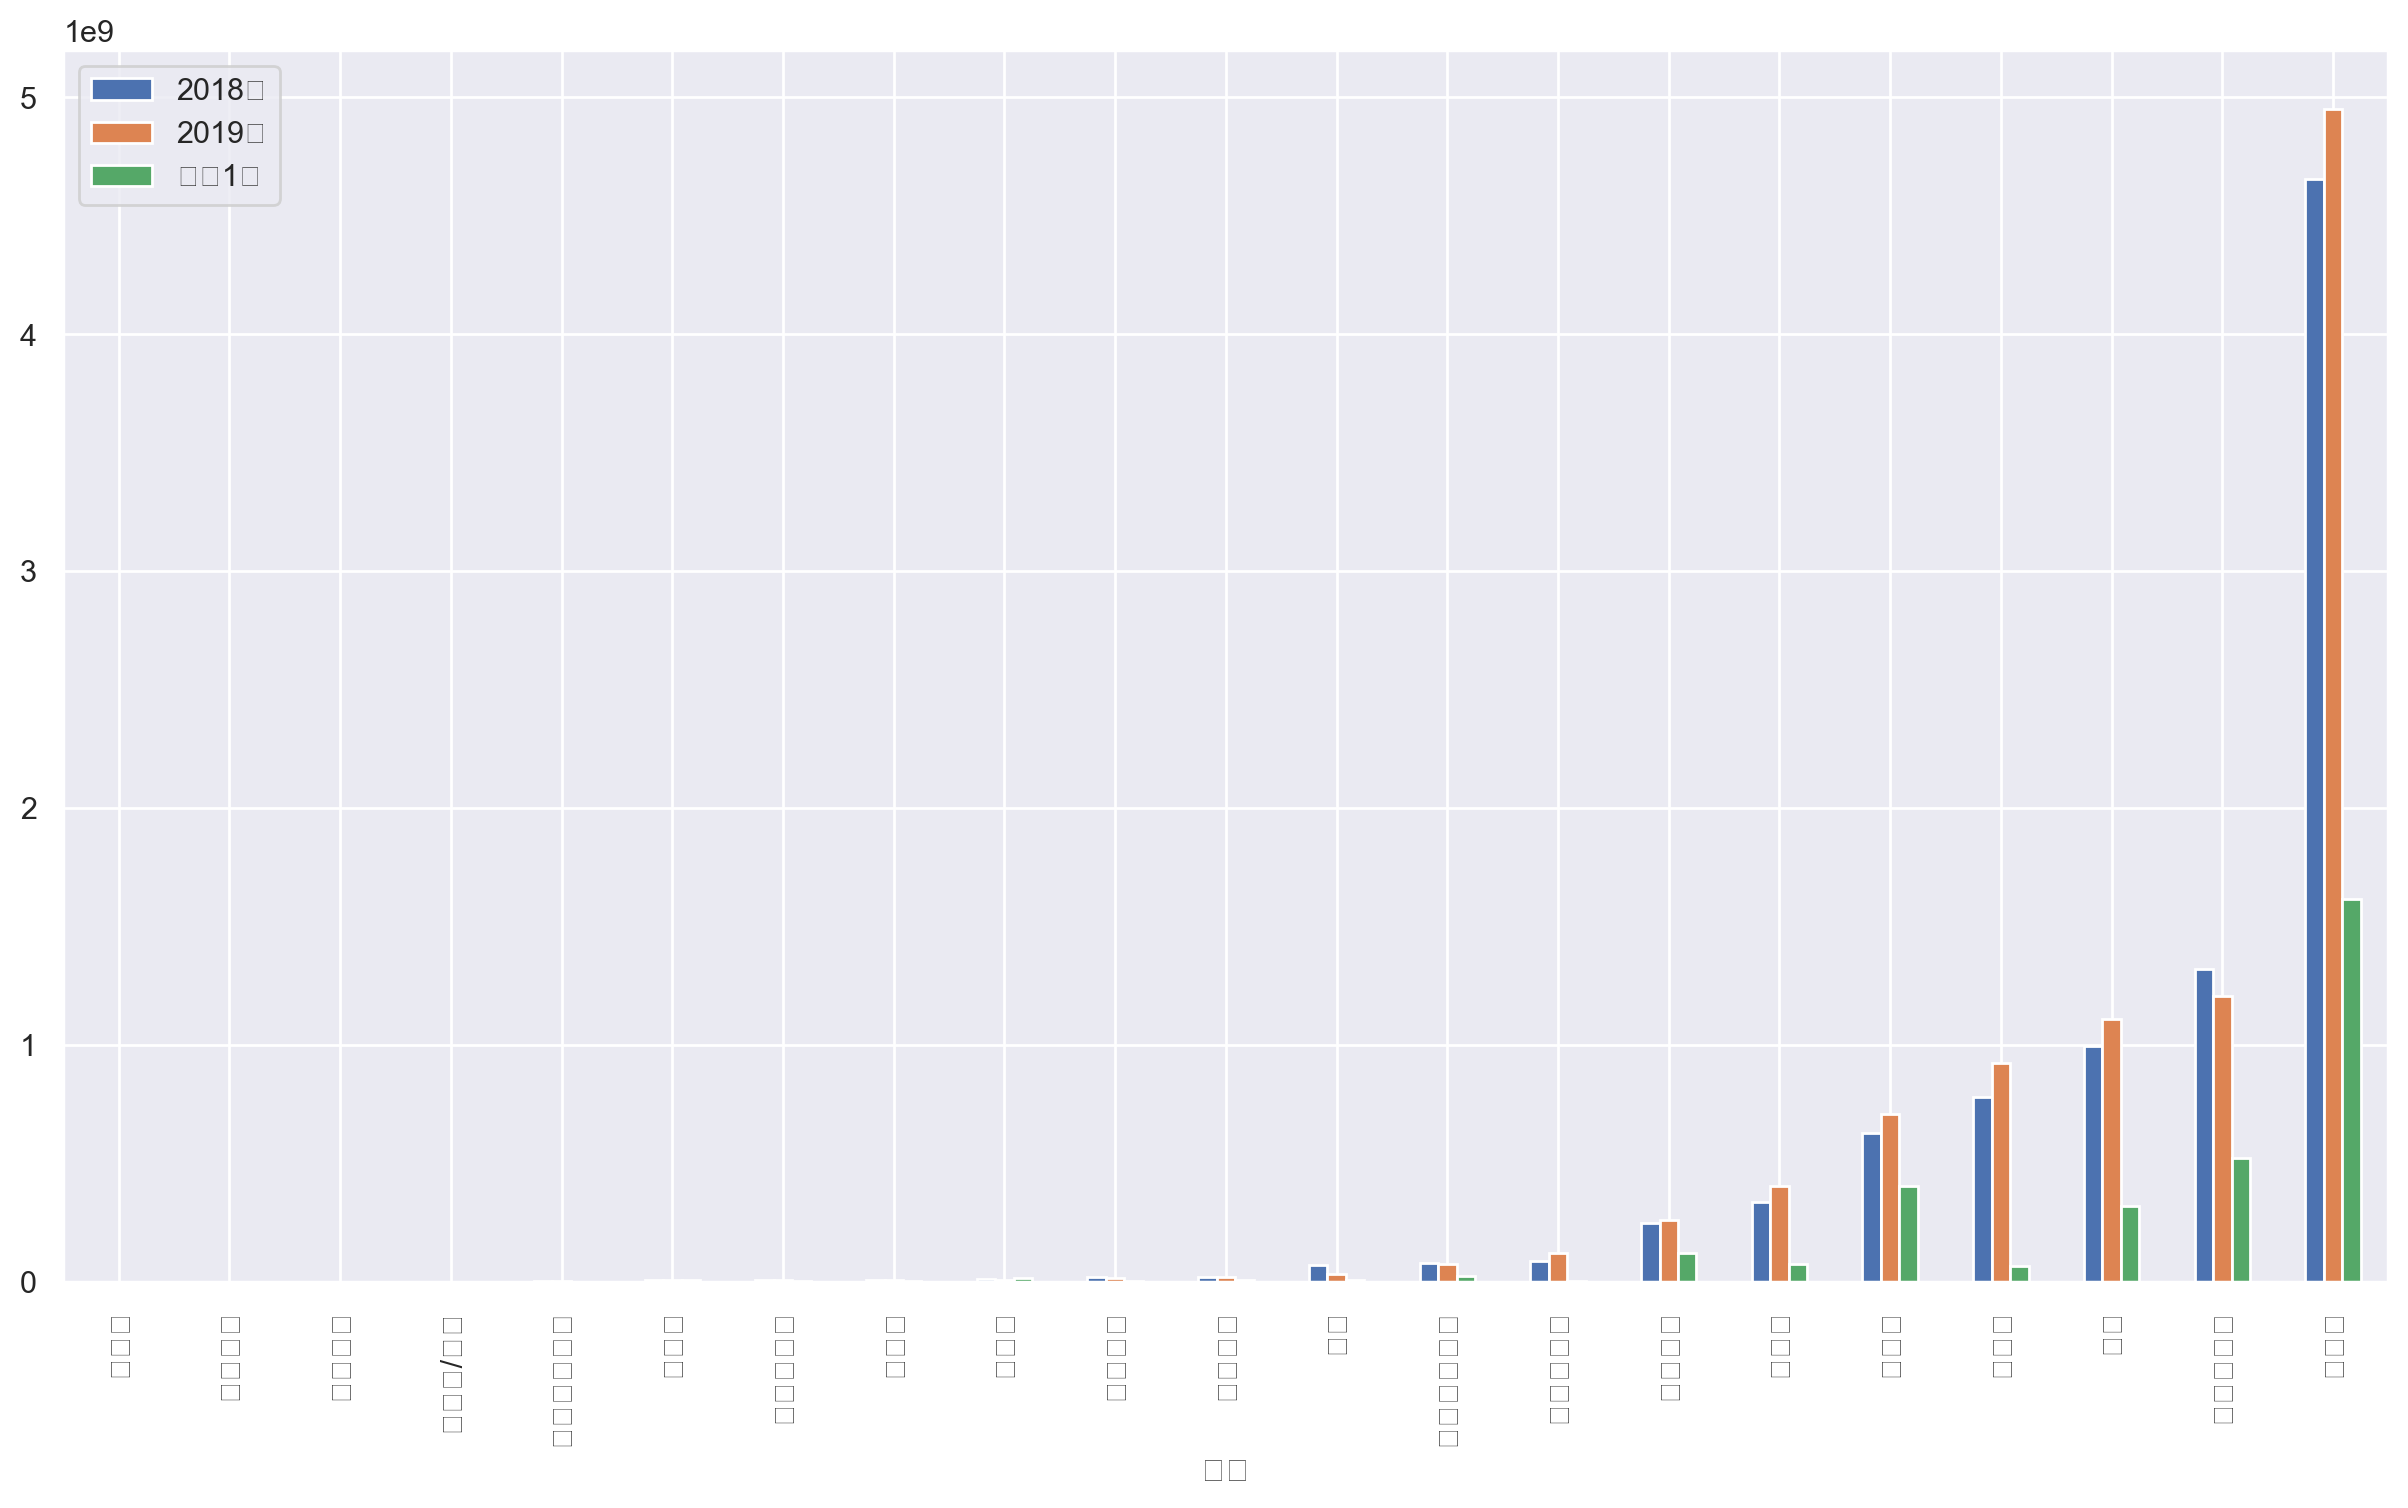

In [191]:
fv_sc.plot.bar()

<AxesSubplot:xlabel='지자체'>

C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda

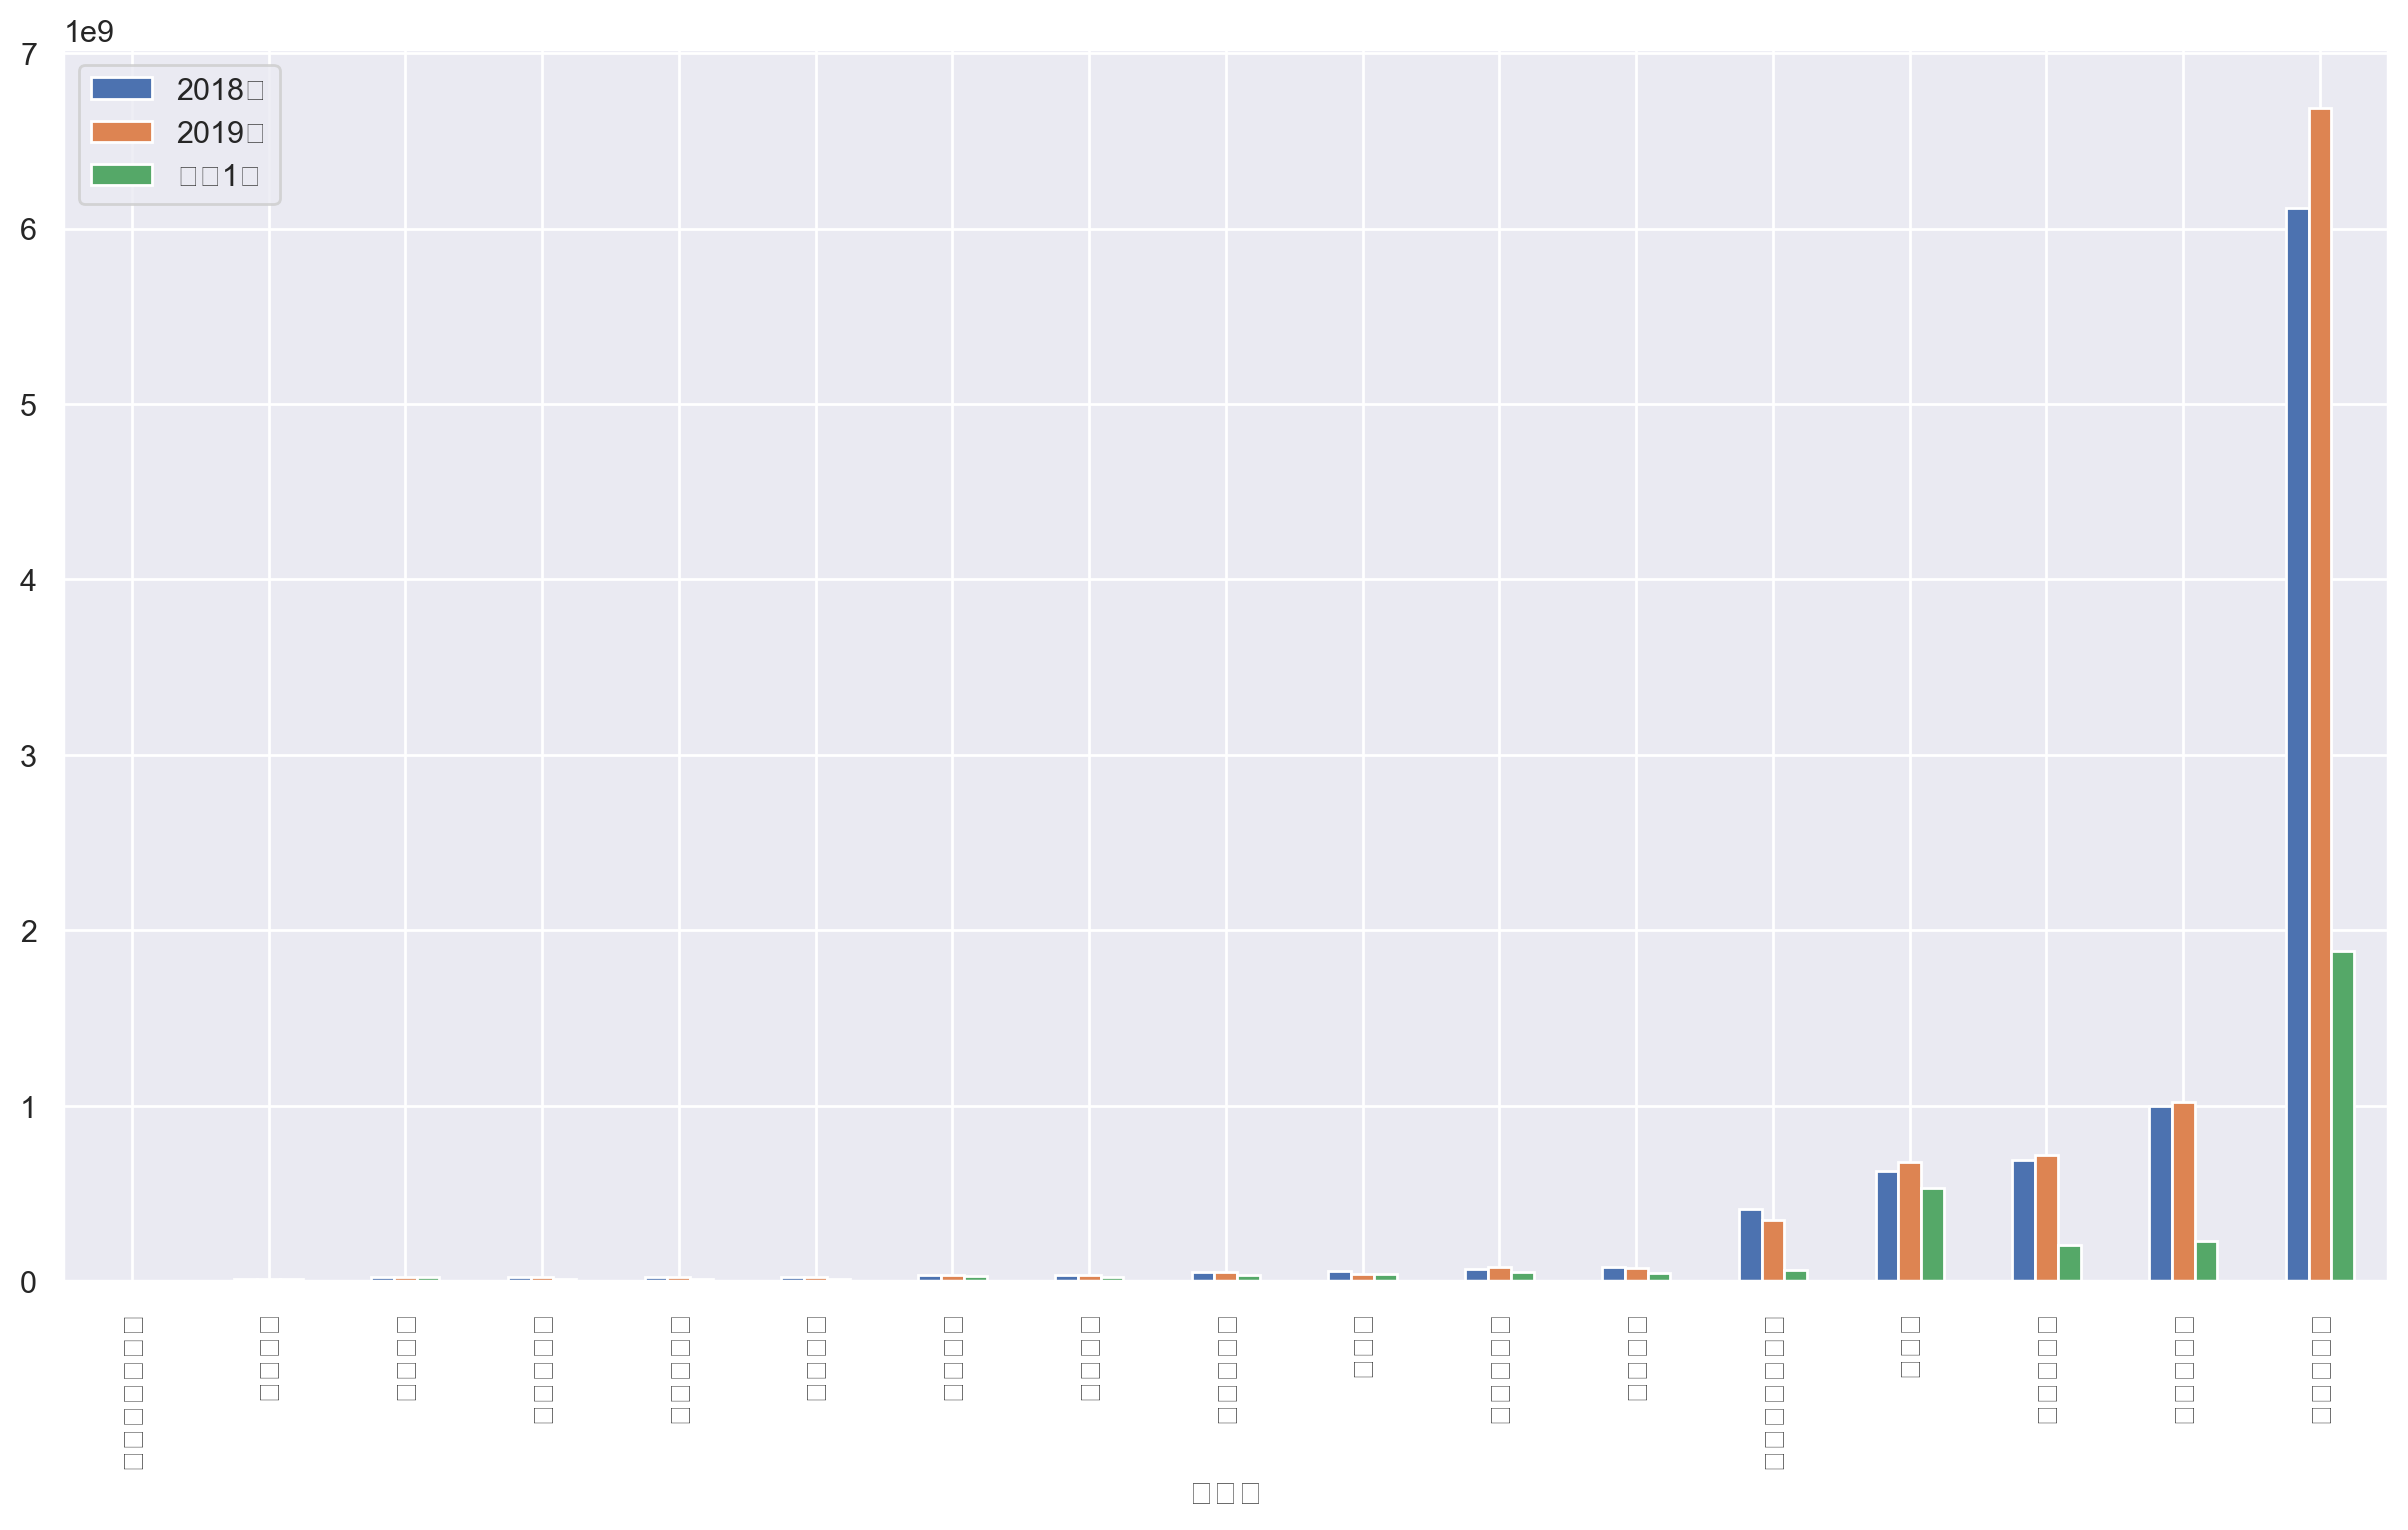

In [192]:
fv_gc.plot.bar()

C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3

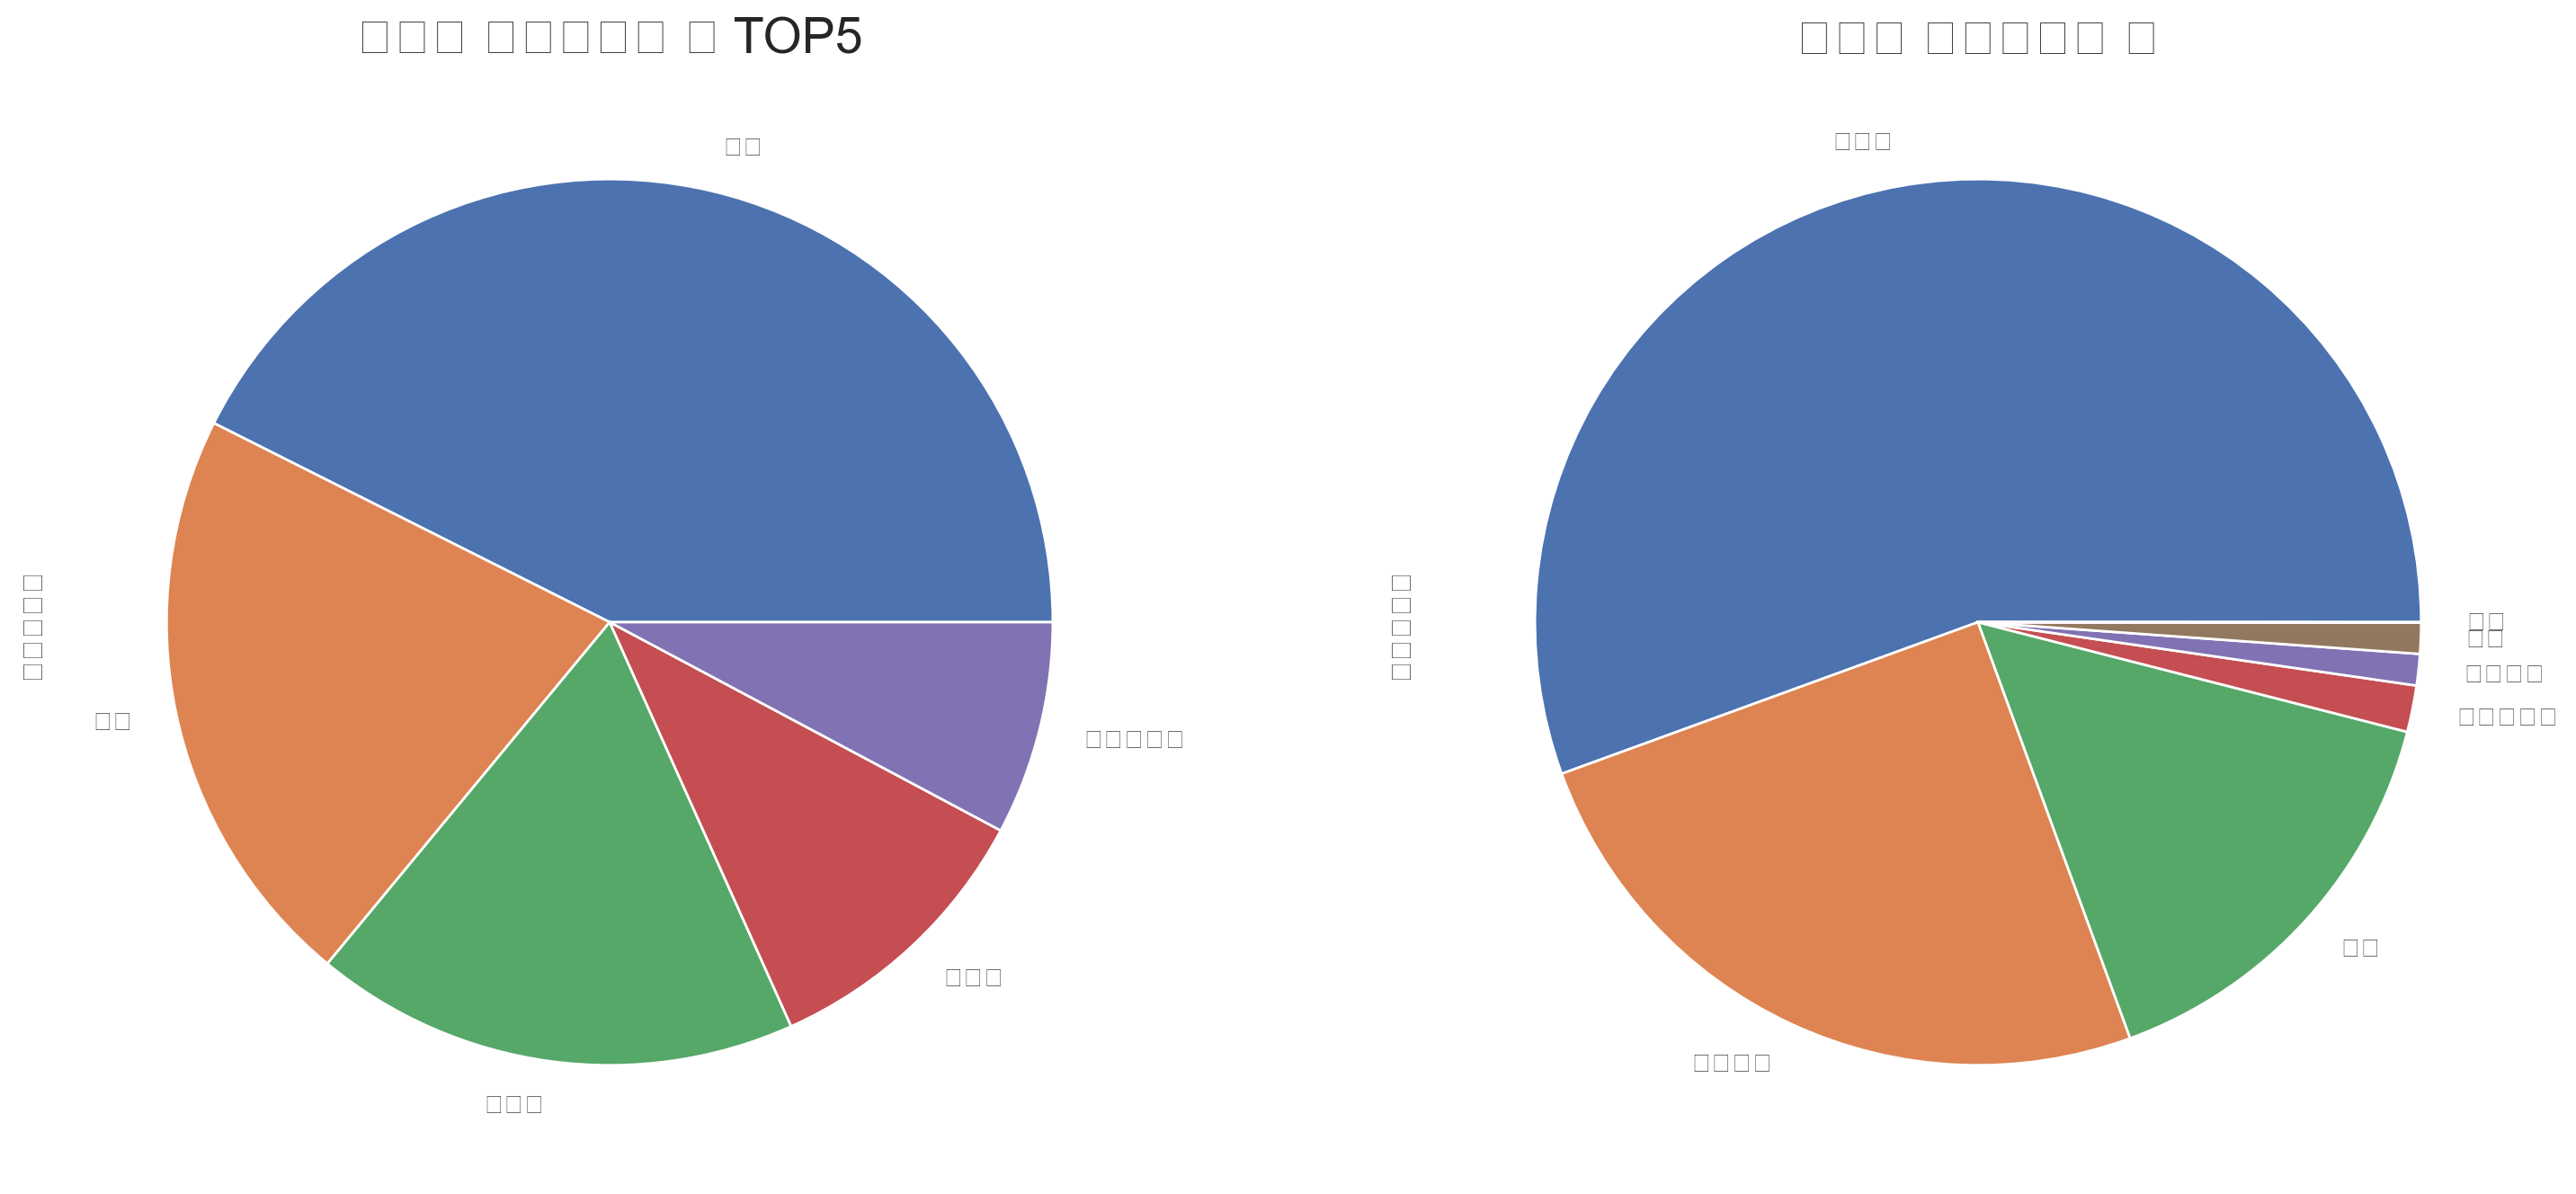

In [193]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
fvco['방한관광객'].plot.pie(ax=ax[0],labels = fvco['국적'])
ax[0].set_title('국적별 방한외국인 수 TOP5', size=20)
fvcon['방한관광객'].plot.pie(ax=ax[1], labels = fvcon['대륙'])
ax[1].set_title('대륙별 방한외국인 수', size=20)
plt.show()


In [194]:
fvr['기준년월'] = fvr['기준년월'].astype('str')
fvr['기준년월'] = fvr['기준년월'].str[:4]+'-'+fvr['기준년월'].str[4:]

C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anacond

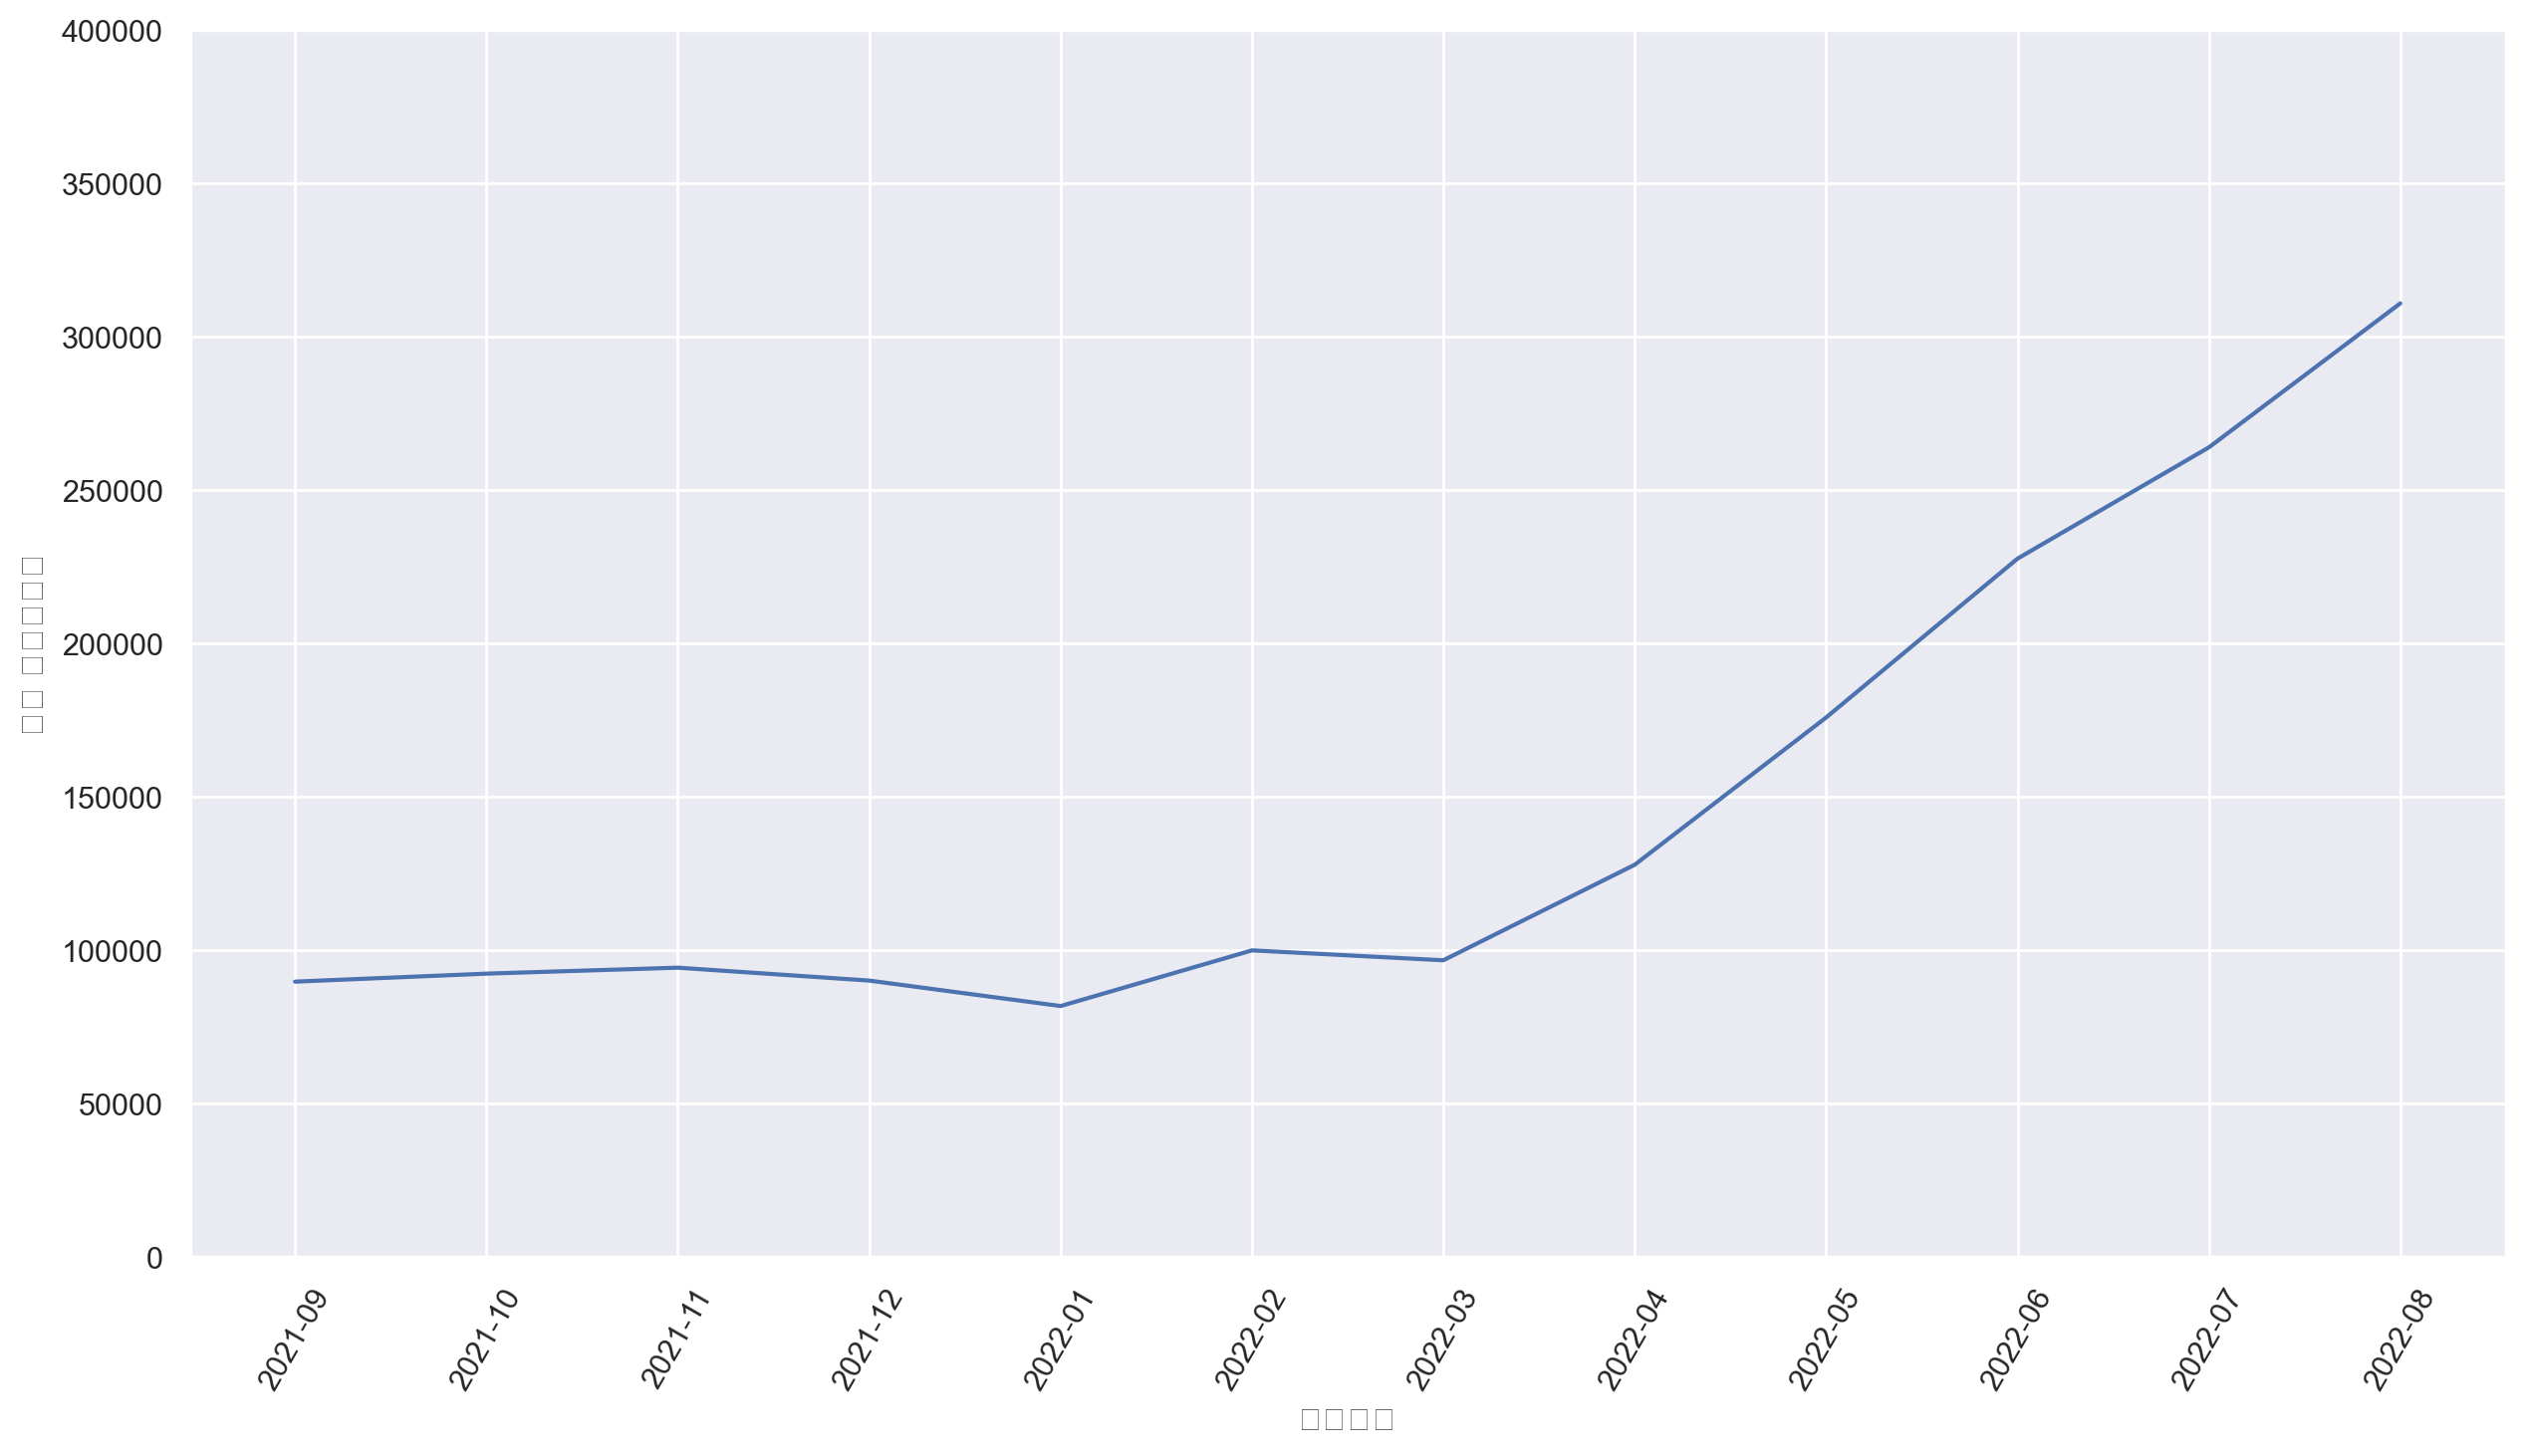

In [195]:
sns.lineplot(data=fvr, x='기준년월', y='방한 외래관광객',)
plt.xticks(rotation= 60)
plt.ylim(0,400000)
plt.show()

<AxesSubplot:xlabel='국가'>

C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sdy59\anaconda3

Font 'rm' does not have a glyph for '\uacfc' [U+acfc], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc774' [U+c774], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud558' [U+d558], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\ucd08' [U+cd08], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uacfc' [U+acfc], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc774' [U+c774], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud558' [U+d558], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\ucd08' [U+cd08], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\uacfc' [U+acfc], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc774' [U+c774], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud558' [U+d558], substituting with a dummy

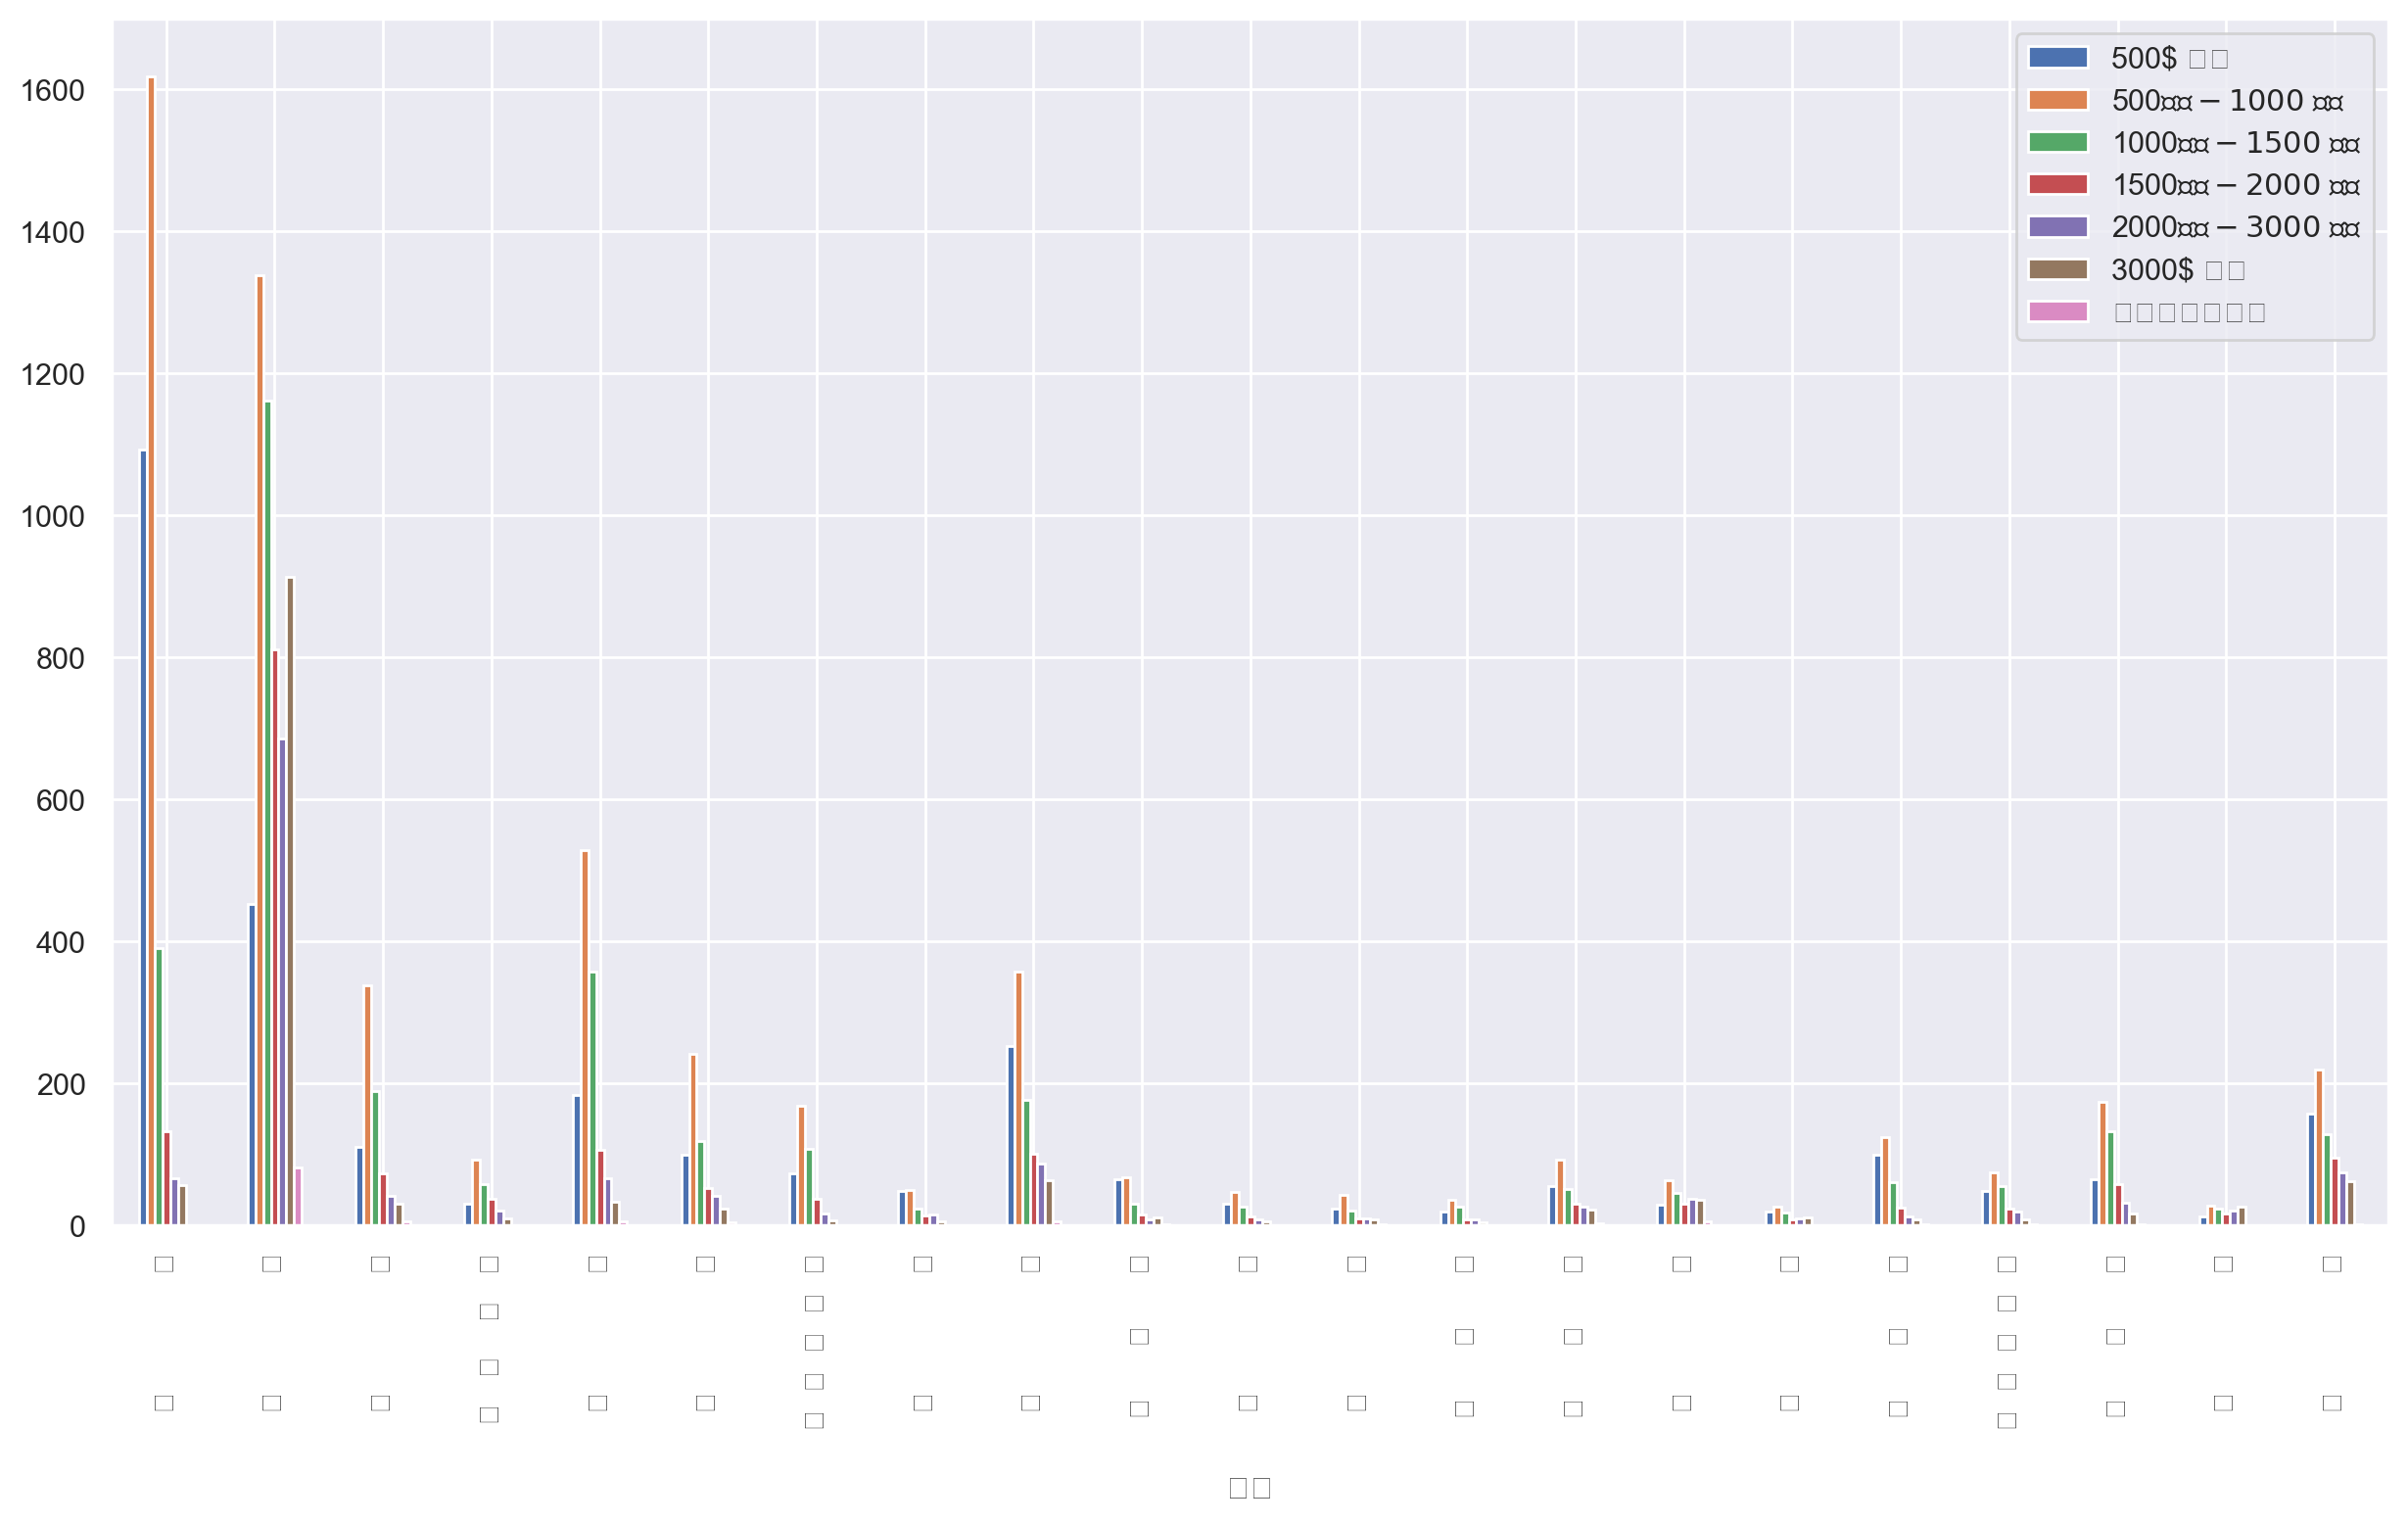

In [198]:
f_consume.plot.bar(x='국가')


<AxesSubplot:xlabel='국가'>

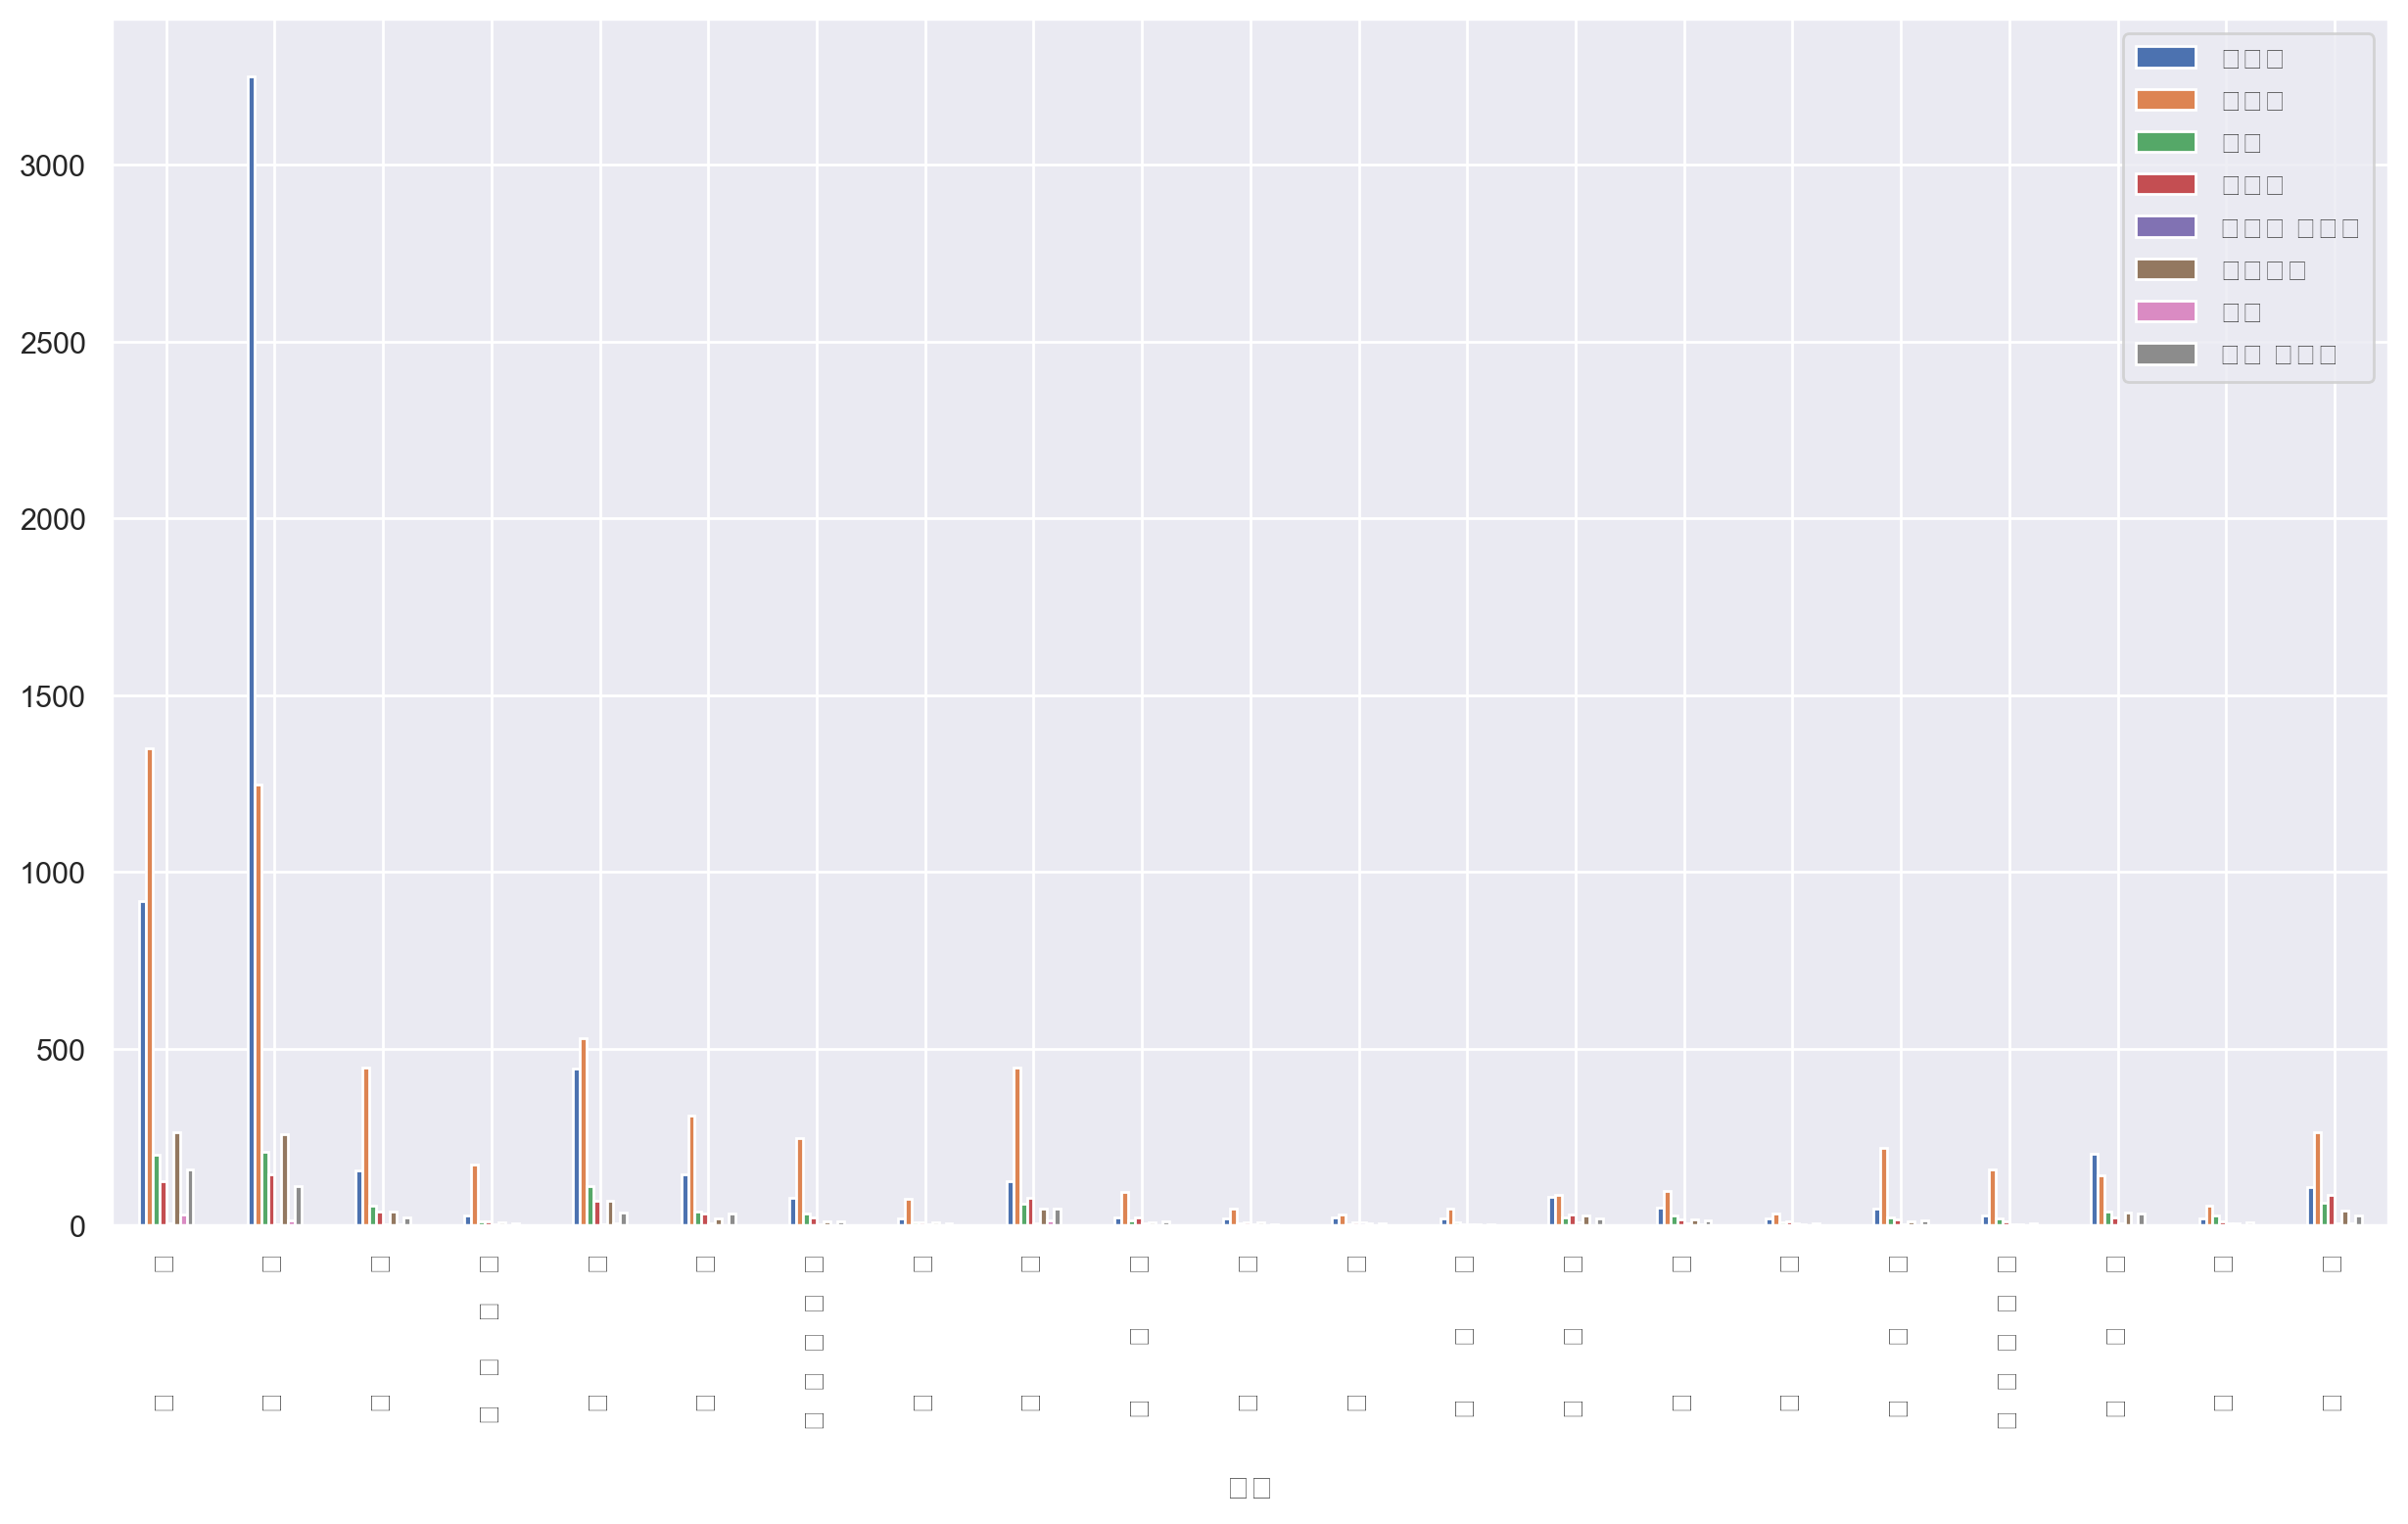

In [202]:
fs_place.plot.bar(x='국가')